## <span style="color: green;">IMPORTING THE LIBRARIES</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <span style="color:green;"> IMPORTING THE DATAFRAME</span>

In [4]:
df = pd.read_csv("Iris (1).csv")

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## <span style="color:green;">EXPLORATORY DATA ANALYSIS</span>

### <span style="color:yellow;">a) Basic Information</span>

In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# <span style="color:yellow;"> a)Data Cleaning</span>

In [15]:
new_cols = [row.lower().strip().replace("-","_").replace(" ","_") for row in df.columns]

df.columns = new_cols

In [16]:
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [17]:
df.isnull().sum()

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [18]:
df.duplicated().sum()

0

## <span style="color:green;">UNIVARIATE ANALYSIS</span>

### <span style="color:yellow;">non_visual_statistics for numerical columns</span>

In [21]:
def non_visual_statistics_numerical(data):
    for col in data:
        print("--"*10,col,"--"*10)
        print(data[col].agg(["min","max","mean","median","std","var"]))
        print()              

In [22]:
num_df = df.select_dtypes(include=["int","float"])

In [23]:
non_visual_statistics_numerical(num_df)

-------------------- id --------------------
min          1.000000
max        150.000000
mean        75.500000
median      75.500000
std         43.445368
var       1887.500000
Name: id, dtype: float64

-------------------- sepallengthcm --------------------
min       4.300000
max       7.900000
mean      5.843333
median    5.800000
std       0.828066
var       0.685694
Name: sepallengthcm, dtype: float64

-------------------- sepalwidthcm --------------------
min       2.000000
max       4.400000
mean      3.054000
median    3.000000
std       0.433594
var       0.188004
Name: sepalwidthcm, dtype: float64

-------------------- petallengthcm --------------------
min       1.000000
max       6.900000
mean      3.758667
median    4.350000
std       1.764420
var       3.113179
Name: petallengthcm, dtype: float64

-------------------- petalwidthcm --------------------
min       0.100000
max       2.500000
mean      1.198667
median    1.300000
std       0.763161
var       0.582414
Name: pet

### <span style="color:yellow;">non_visual_statistics for categorical columns</span>

In [25]:
def non_visual_statistics_numerical(data):
    for col in data:
        print("--"*10,col,"--"*10)
        print(data[col].agg(["count","unique","nunique"]))
        print("value_counts: ",data[col].value_counts())
        print()

In [26]:
cat_df = df.select_dtypes(include=["object"])

In [27]:
non_visual_statistics_numerical(cat_df)

-------------------- species --------------------
count                                                 150
unique     [Iris-setosa, Iris-versicolor, Iris-virginica]
nunique                                                 3
Name: species, dtype: object
value_counts:  species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64



### <span style="color:yellow;">visual analaysis for numerical columns</span>

<Axes: xlabel='sepallengthcm', ylabel='Count'>

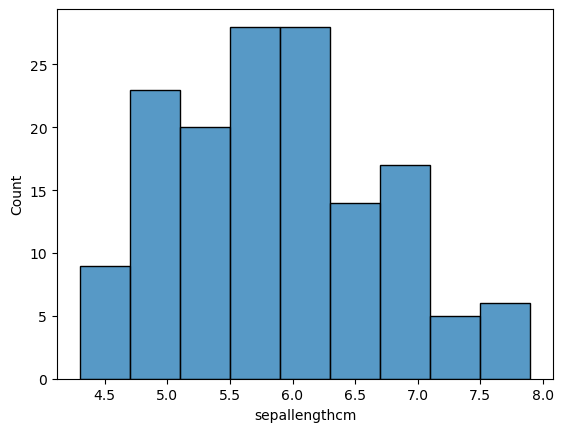

In [29]:
sns.histplot(data=df,x='sepallengthcm')

<Axes: xlabel='sepallengthcm'>

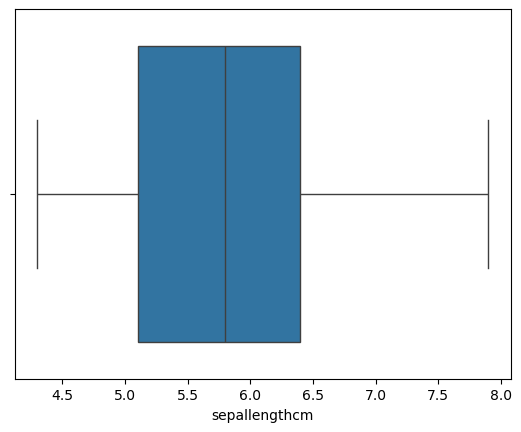

In [30]:
sns.boxplot(data=df,x='sepallengthcm')

<Axes: xlabel='sepallengthcm', ylabel='Density'>

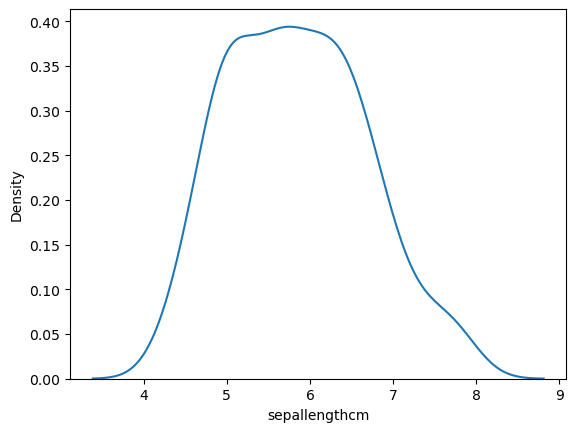

In [31]:
sns.kdeplot(data=df,x='sepallengthcm')

<Axes: xlabel='sepallengthcm', ylabel='Proportion'>

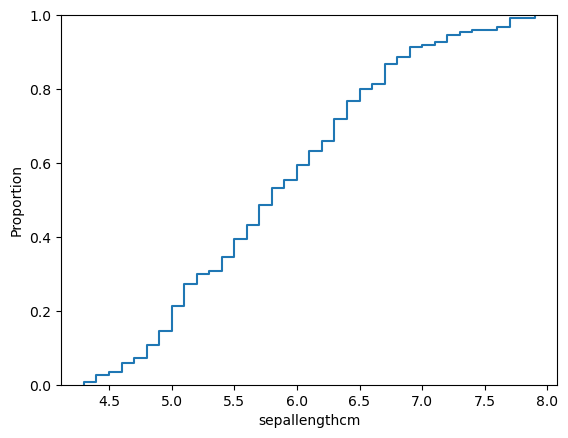

In [32]:
sns.ecdfplot(data=df,x='sepallengthcm')

### <span style="color:yellow;">visual analaysis for categorical column</span>

<Axes: xlabel='species', ylabel='count'>

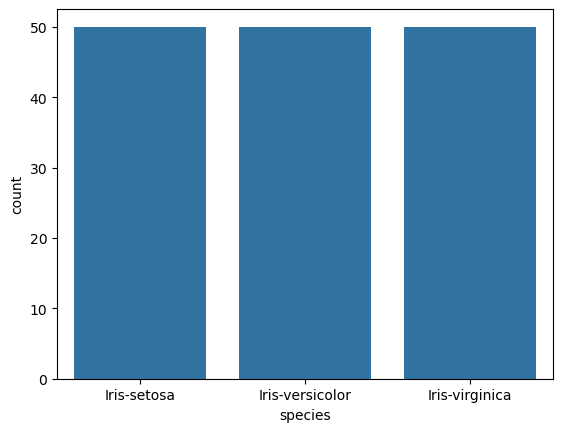

In [34]:
sns.countplot(data=df,x="species")

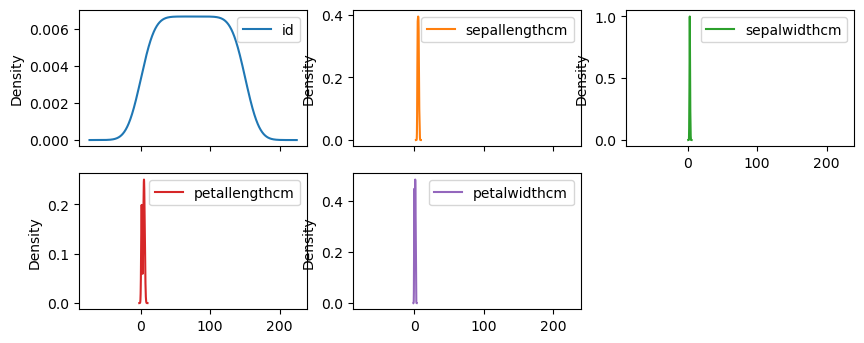

In [35]:
df.plot(kind='kde', subplots=True, layout=(3, 3), figsize=(10, 6))
plt.show()

## <span style="color:green;">BIVARIATE ANALYSIS </span>

<Axes: xlabel='species', ylabel='sepallengthcm'>

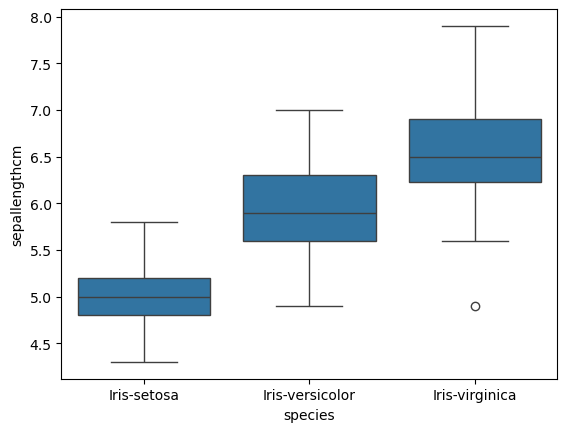

In [37]:
# cat vs num
sns.boxplot(data=df,x='species', y='sepallengthcm')

<Axes: xlabel='species', ylabel='sepallengthcm'>

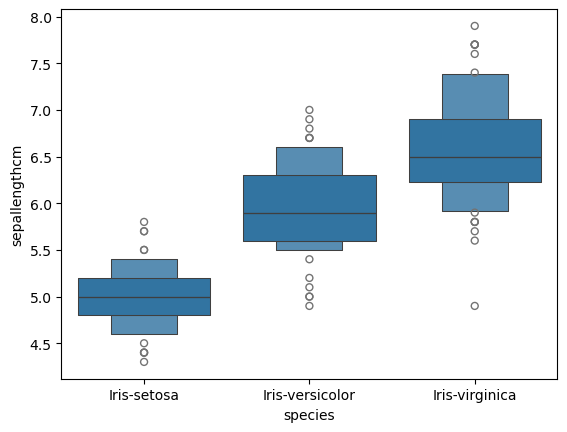

In [38]:
sns.boxenplot(data=df,x='species', y='sepallengthcm')

<Axes: xlabel='species', ylabel='sepallengthcm'>

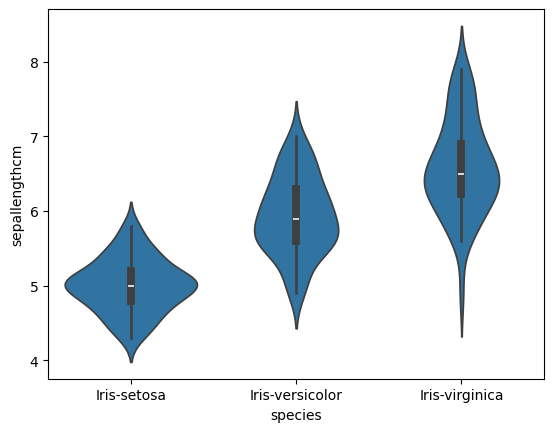

In [39]:
sns.violinplot(data=df,x='species', y='sepallengthcm')

In [40]:
# num vs num

<Axes: xlabel='sepalwidthcm', ylabel='sepallengthcm'>

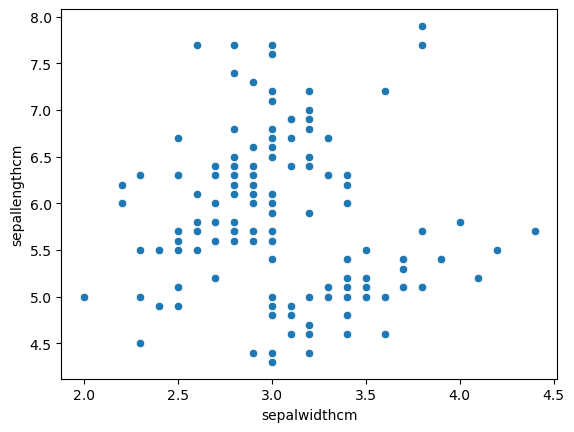

In [41]:
sns.scatterplot(data=df,x='sepalwidthcm', y='sepallengthcm')

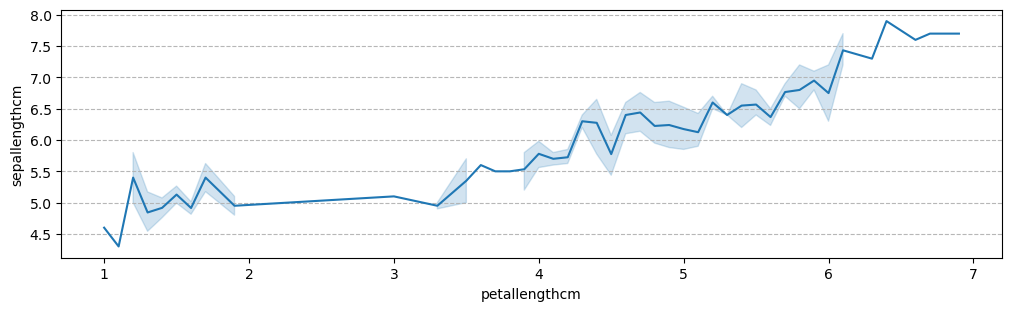

In [42]:
fig,ax=plt.subplots(figsize=(10,3),layout="constrained")
sns.lineplot(data=df,x='petallengthcm', y='sepallengthcm')
plt.grid(axis="y",linestyle="--",alpha=0.9)

## <span style="color:green;">MULTIVARIATE ANALYSIS </span>

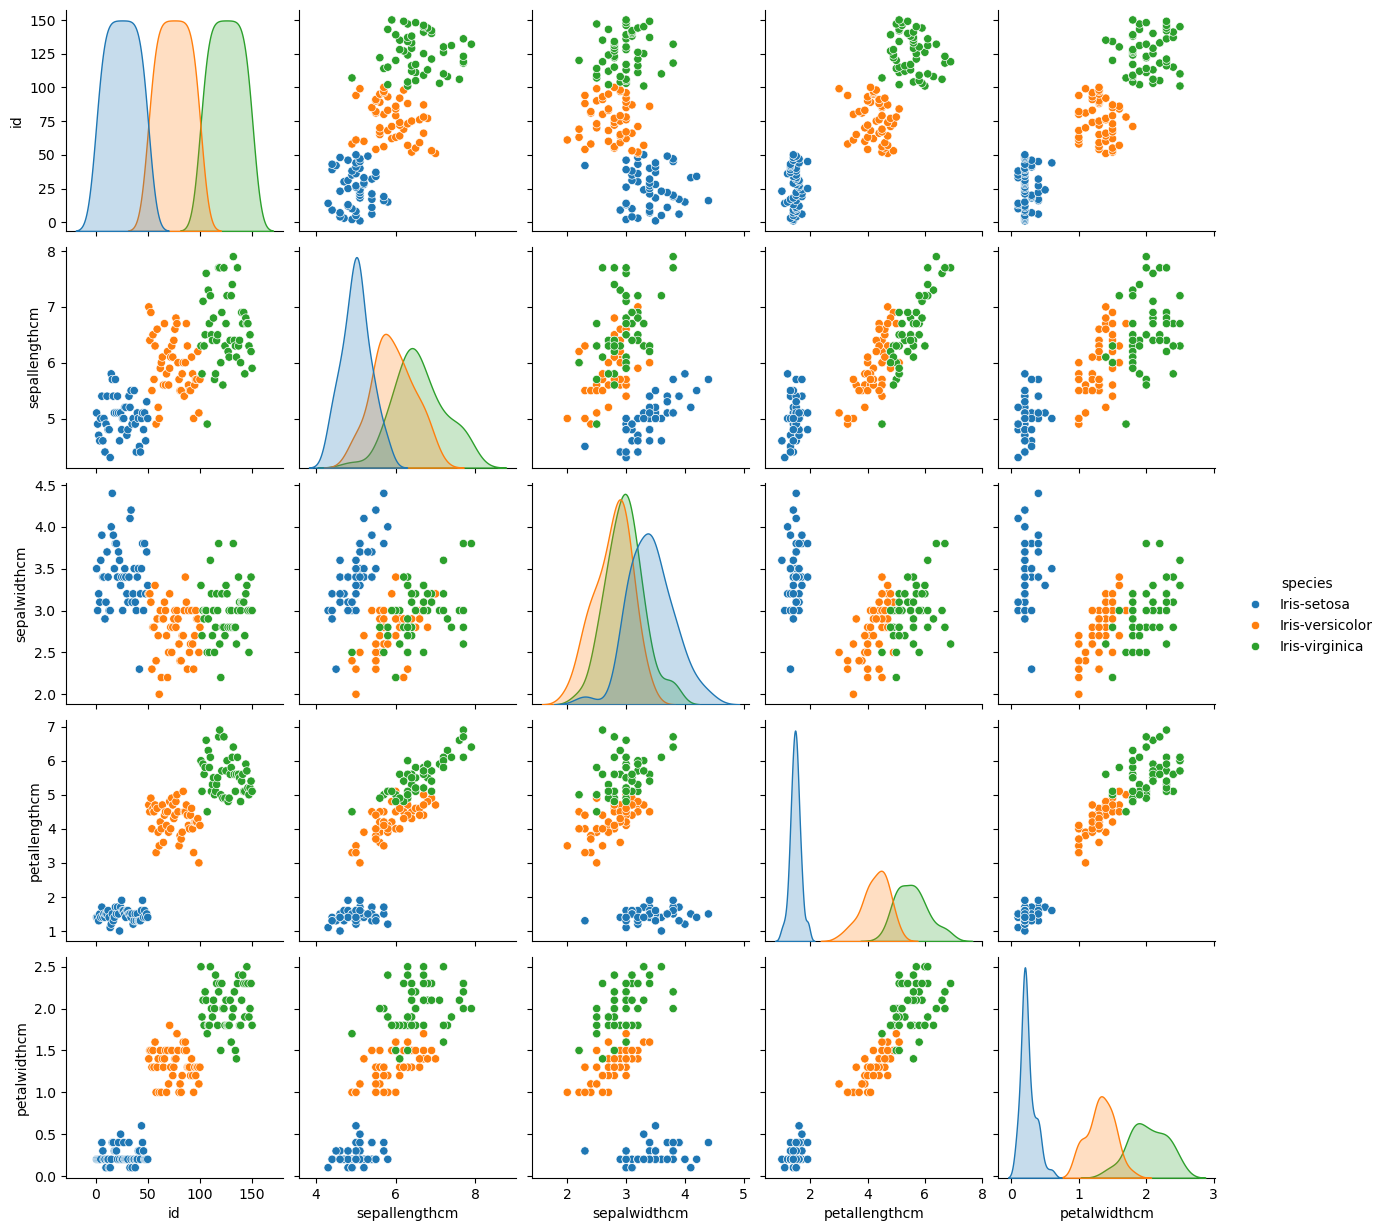

In [44]:
sns.pairplot(data=df,hue="species")

<Axes: >

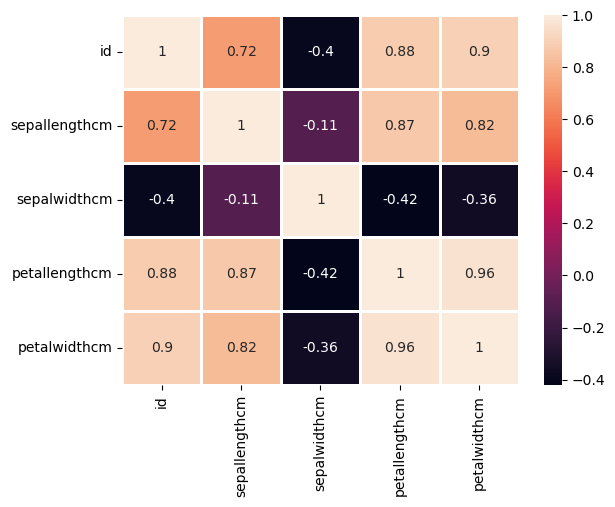

In [45]:
sns.heatmap(num_df.corr(),annot=True,linewidth=0.8)

## <span style="color:red;">BUILDING ML MODEL</span>


In [47]:
X = df.select_dtypes(include=["int","float"])

In [48]:
X.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [49]:
y = df.select_dtypes(include=["object"])

In [50]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_train.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
128,129,6.4,2.8,5.6,2.1
131,132,7.9,3.8,6.4,2.0
145,146,6.7,3.0,5.2,2.3
108,109,6.7,2.5,5.8,1.8
143,144,6.8,3.2,5.9,2.3


In [52]:
y_train.head()

,species
128,Iris-virginica
131,Iris-virginica
145,Iris-virginica
108,Iris-virginica
143,Iris-virginica


In [53]:
X_test.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4


In [54]:
y_test.head()

,species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_transformed = scaler.fit_transform(X_train)

In [56]:
X_train_transformed.shape

(127, 5)

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train_transformed = label_encoder.fit_transform(y_train)

y_train_transformed.shape

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(127,)

In [58]:
from sklearn.linear_model import LogisticRegression

Classifier = LogisticRegression()

Classifier.fit(X_train_transformed,y_train_transformed)

LogisticRegression()

In [59]:
X_test_transformed = scaler.transform(X_test)

In [78]:
y_test_transformed = label_encoder.transform(y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [61]:
y_test_pred = Classifier.predict(X_test_transformed)

In [62]:

from sklearn import metrics

metrics.accuracy_score(y_test_transformed, y_test_pred)

1.0

In [76]:
#KNN

from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier()


classifier.fit(X_train_transformed, y_train_transformed)


y_test_pred = classifier.predict(X_test_transformed)


metrics.accuracy_score(y_test_transformed, y_test_pred)

1.0

In [80]:
#DT

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train_transformed,y_train_transformed)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test_transformed,y_test_pred)

1.0

In [82]:
# RF

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train_transformed,y_train_transformed)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test_transformed,y_test_pred)

1.0